In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
sns.set_style("white")

In [3]:
import numpy as np
import pandas as pd
from scipy import stats

In [4]:
triples = pd.read_csv('triples.csv',names=['sub','verb','percent'])
rise_verbs = triples[triples['verb'].isin(
    ['rise','increase','grow','climb','jump','surge','gain','soar','raise','advance'])]
fall_verbs = triples[triples['verb'].isin(
    ['fall','decline','drop','slip','plunge','slide','lose','tumble','plummet','ease'])]

In [5]:
rise_verbs.percent = rise_verbs['percent'].str.replace(' %,','')
rise_verbs.percent = rise_verbs['percent'].str.replace(' percent,','').astype('float64')
fall_verbs.percent = fall_verbs['percent'].str.replace(' %,','')
fall_verbs.percent = fall_verbs['percent'].str.replace(' percent,','').astype('float64')

C:\WinPython\python-3.5.3.amd64\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [6]:
rise_verbs = rise_verbs[rise_verbs.percent < 100]
rise_verbs = rise_verbs[rise_verbs.percent > 0]
fall_verbs = fall_verbs[fall_verbs.percent < 100]
fall_verbs = fall_verbs[fall_verbs.percent > 0]

In [7]:
rise_verbs.head()

,,sub,verb,percent
0.0,1,sale,rise,11.4
12.0,24,earnings,increase,7.0
13.0,25,sale,increase,10.0
21.0,44,revenue,rise,11.0
22.0,45,revenue,rise,8.4


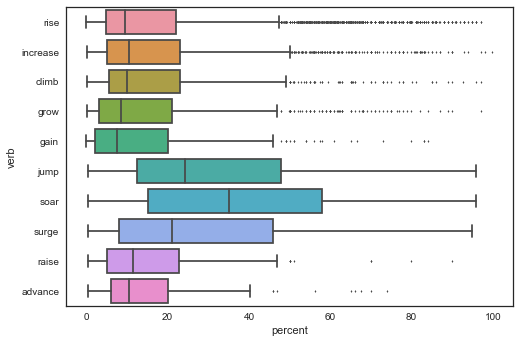

In [8]:
sns.boxplot(x='percent', y='verb', data=rise_verbs, fliersize=2)
plt.savefig('fig/likelihood_iqr_rise.pdf')

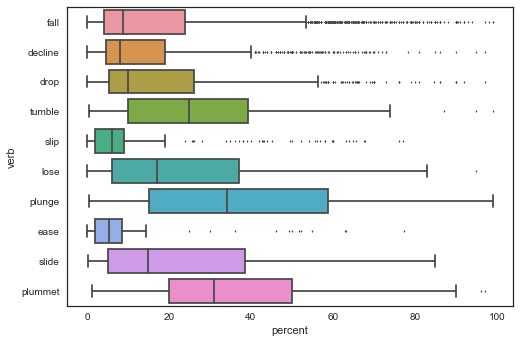

In [9]:
sns.boxplot(x='percent', y='verb', data=fall_verbs, fliersize=2)
plt.savefig('fig/likelihood_iqr_fall.pdf')

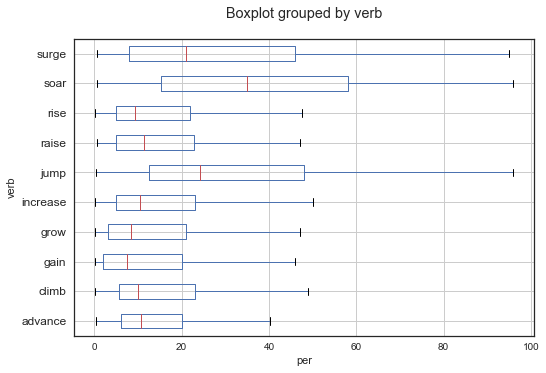

In [10]:
rise_verbs.boxplot(by='verb',vert=False,sym='')
plt.xlabel('per')
plt.ylabel('verb')
plt.title('')
# plt.savefig('fig/likelihood_iqr_rise.pdf', bbox_inches='tight')
# plt.show()

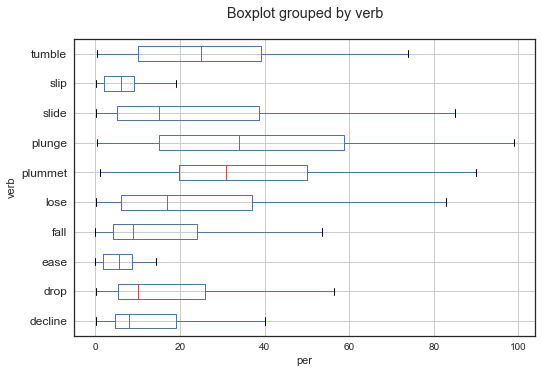

In [11]:
fall_verbs.boxplot(by='verb',vert=False,sym='')
plt.xlabel('per')
plt.ylabel('verb')
plt.title('')
# plt.savefig('fig/likelihood_iqr_fall.pdf', bbox_inches='tight')
# plt.show()